# FIR filter Design

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

##### Parameter settings

The cut-off frequency for the filter must be defined in units of half the sample frequency. We choose to make a low-pass filter with the cut-off at a quater of half the sample frequency.  
We prepare the calculation of the use of more cut-off frequencies like in band-pass filters. Therefor we put the cut-off in an array.  
Let us take a filter length of *ntap*.

In [2]:
cutoff = np.array([3/8.])
ntap = 21

##### Calculate the filter coefficients

The filter to be designed is a FIR filter using the window method.  
Calculate the filter coefficients.  
Modify the definitions below to change to a high-pass filter (or band-pass filter in case you defined an array of two cut-off frequencies). 

In [3]:
a = sig.firwin(ntap,cutoff)

In [4]:
a1 = sig.firwin(ntap,cutoff,pass_zero = False)

In [5]:
a

array([-1.80652472e-03, -3.36066287e-03,  2.46171648e-18,  1.13641347e-02,
        1.49735376e-02, -1.31987358e-02, -5.44612272e-02, -3.30123691e-02,
        1.02988599e-01,  2.88399705e-01,  3.76227088e-01,  2.88399705e-01,
        1.02988599e-01, -3.30123691e-02, -5.44612272e-02, -1.31987358e-02,
        1.49735376e-02,  1.13641347e-02,  2.46171648e-18, -3.36066287e-03,
       -1.80652472e-03])

##### Plot the filter coefficients

The filter coefficients calculated is in fact the impulse response in the time domain.  

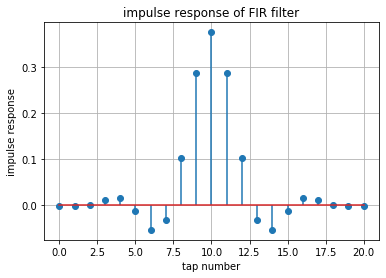

In [6]:
plt.stem(a,use_line_collection=True)
plt.xlabel('tap number')
plt.ylabel('impulse response')
plt.grid()
plt.title('impulse response of FIR filter')
plt.show()

Note that the result is a impulse response that is shifted in time by half the number of filter taps. 

#### Bode plot of the filter

In [7]:
w, v = sig.freqz(a)

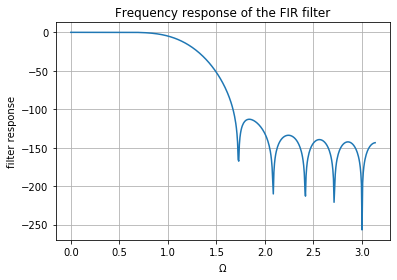

In [8]:
plt.plot(w,20*np.log(abs(v)))
plt.xlabel(r'$\Omega$')
plt.ylabel('filter response')
plt.grid()
plt.title('Frequency response of the FIR filter')
plt.show()

Note that the above frequency range is normalized to $\pi$: $[0,\pi]$.

Calculate from the impluse reaponse back what the frequency spectrum looks like in the discrete frequency domain. 

In [9]:
dfk = np.fft.fft(a)

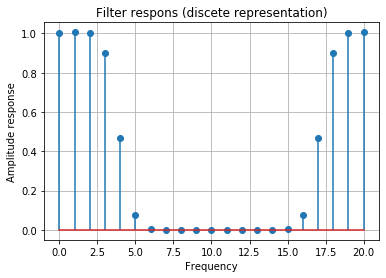

In [10]:
plt.stem(np.abs(dfk),use_line_collection=True)
plt.xlabel('Frequency')
plt.ylabel('Amplitude response')
plt.grid()
plt.title('Filter respons (discete representation)')
plt.show()

Note that this is the full frequency range from zero to the sample frequency. The second part is of course the mirror of the first part except from frequency zero.  
The cut-off frequency is clearly seen at quarter of half the sample frequency.

#### Application of the filter on a random signal

First we have to construct a random signal. 

In [11]:
tsig = np.random.uniform(size=400)

We plot the signal to be compared with the filterd signal later. 

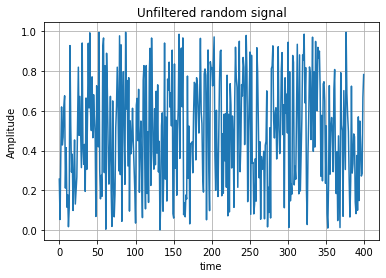

In [12]:
plt.plot(tsig)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Unfiltered random signal')
plt.show()

In [13]:
ftsig = sig.lfilter(a,np.array([1]),tsig)

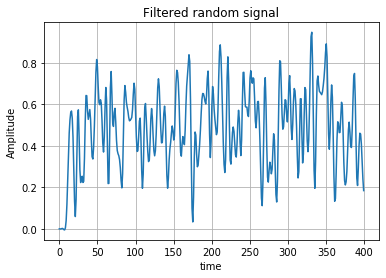

In [14]:
plt.plot(ftsig)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Filtered random signal')
plt.show()

Note that the filterd signal shows a signal that starts at zero, this is the effect of running in of the filter. The filtered signal is only valid from sample *n=21*, the number of taps. 